<a name="Libraries"></a>
## 1. Installing and importing libraries


In [ ]:
# %%capture
# # Install relevant libraries
# !pip install geopandas folium 

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import random
from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as rmse
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [10]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

<a name="Data"></a>
## 2. Loading and previewing data

In [11]:
data_path = ''
# Load files
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv', )
samplesubmission = pd.read_csv(data_path + 'SampleSubmission.csv')

# Preview train dataset
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.73_28.77_2019_1 -23.73000   28.77000  2019        1   
1  ID_-23.73_28.77_2019_2 -23.73000   28.77000  2019        2   
2  ID_-23.73_28.77_2019_3 -23.73000   28.77000  2019        3   
3  ID_-23.73_28.77_2019_4 -23.73000   28.77000  2019        4   
4  ID_-23.73_28.77_2019_5 -23.73000   28.77000  2019        5   

   SulphurDioxide_SO2_column_number_density  \
0                                   0.00017   
1                                  -0.00016   
2                                  -0.00007   
3                                   0.00015   
4                                   0.00002   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                       0.71317   
1                                       0.81291   
2                                       0.86031   
3                                       0.42228   
4                                       1.00458   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                         0.00010   
1                                        -0.00014   
2                                        -0.00006   
3                                         0.00009   
4                                         0.00003   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                        0.22393                             24.93944   
1                        0.08028                             16.62416   
2                        0.16105                            -13.23724   
3                        0.04650                            -13.53465   
4                        0.21425                            -13.47572   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                            56.89620                           -89.54503   
1                            31.13726                           -88.95653   
2                            44.44106                           -86.53589   
3                            61.25250                           -80.95763   
4                            30.80077                           -75.27775   

   SulphurDioxide_solar_zenith_angle  \
0                           17.99157   
1                           20.22361   
2                           23.73720   
3                           22.60133   
4                           20.76787   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                        0.00003   
1                                       -0.00007   
2                                       -0.00003   
3                                        0.00003   
4                                        0.00001   

   CarbonMonoxide_CO_column_number_density  \
0                                  0.02341   
1                                  0.02419   
2                                  0.02370   
3                                  0.02236   
4                                  0.02304   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                2829.88111                   2583.71728   
1                                2136.61493                   1864.31924   
2                                1907.51550                   1904.70191   
3                                2122.06795                   1696.20634   
4                                1750.01113                   1175.44583   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    835381.85189                             24.22746   
1                    836015.10938                            -14.29023   
2                    835929.14650                              3.86252   
3                    835722.44792                             15.10151   
4                    835931.96250                            -28.06828   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_an

In [12]:
# Preview test dataset
test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.53_27.47_2019_1 -23.53000   27.47000  2019        1   
1  ID_-23.53_27.47_2019_2 -23.53000   27.47000  2019        2   
2  ID_-23.53_27.47_2019_3 -23.53000   27.47000  2019        3   
3  ID_-23.53_27.47_2019_4 -23.53000   27.47000  2019        4   
4  ID_-23.53_27.47_2019_5 -23.53000   27.47000  2019        5   

   SulphurDioxide_SO2_column_number_density  \
0                                   0.00008   
1                                   0.00018   
2                                   0.00006   
3                                   0.00048   
4                                   0.00019   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                       0.45447   
1                                       0.42317   
2                                       0.71309   
3                                       0.43445   
4                                       0.78304   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                         0.00003   
1                                         0.00006   
2                                         0.00004   
3                                         0.00017   
4                                         0.00014   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                        0.11429                            -80.28631   
1                        0.07510                            -17.76569   
2                        0.11421                             16.72565   
3                        0.13139                            -22.47534   
4                        0.16114                              4.75036   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                            55.54896                           -94.96439   
1                            56.32125                           -89.76383   
2                            33.66298                           -86.37657   
3                            60.54937                           -79.31057   
4                            38.09723                           -76.27611   

   SulphurDioxide_solar_zenith_angle  \
0                           30.22988   
1                           23.31351   
2                           20.60369   
3                           23.90303   
4                           22.02129   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                        0.00002   
1                                        0.00002   
2                                        0.00002   
3                                        0.00007   
4                                        0.00006   

   CarbonMonoxide_CO_column_number_density  \
0                                  0.02594   
1                                  0.02504   
2                                  0.02502   
3                                  0.02236   
4                                  0.02358   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                2343.10925                   1303.42130   
1                                2187.90980                    347.59164   
2                                2313.46731                   1310.41037   
3                                2068.38900                    279.87800   
4                                1994.88150                    942.68533   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    836310.92669                            -80.52554   
1                    836017.16010                            -56.48058   
2                    835944.80127                              2.65210   
3                    836558.88281                            -92.57146   
4                    835760.43695                              2.70936   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_an

In [13]:
# Preview sample submission file
samplesubmission.head()

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-23.53_27.47_2019_1         0
1  ID_-23.53_27.47_2019_2         0
2  ID_-23.53_27.47_2019_3         0
3  ID_-23.53_27.47_2019_4         0
4  ID_-23.53_27.47_2019_5         0

In [14]:
# Check size and shape of datasets
# train.shape, test.shape, samplesubmission.shape
train.shape

(74005, 76)

In [15]:
# Train to test sets ratio
(test.shape[0]) / (train.shape[0] + test.shape[0])

0.2751004016064257

<a name="Statistics"></a>
## 3. Statistical summaries

In [16]:
# Train statistical summary
train.describe(include = 'all')

ID_LAT_LON_YEAR_WEEK    latitude   longitude        year  \
count                    74005 74005.00000 74005.00000 74005.00000   
unique                   74005         NaN         NaN         NaN   
top     ID_-23.73_28.77_2019_1         NaN         NaN         NaN   
freq                         1         NaN         NaN         NaN   
mean                       NaN   -27.82972    27.78274  2020.47805   
std                        NaN     2.76059     2.74667     1.11126   
min                        NaN   -33.93000    21.07000  2019.00000   
25%                        NaN   -29.63000    26.67000  2019.00000   
50%                        NaN   -28.13000    28.77000  2020.00000   
75%                        NaN   -25.73000    29.47000  2021.00000   
max                        NaN   -23.73000    31.17000  2022.00000   

           week_no  SulphurDioxide_SO2_column_number_density  \
count  74005.00000                               72075.00000   
unique         NaN                                       NaN   
top            NaN                                       NaN   
freq           NaN                                       NaN   
mean      26.15610                                   0.00026   
std       14.84384                                   0.00060   
min        1.00000                                  -0.00099   
25%       13.00000                                  -0.00007   
50%       26.00000                                   0.00015   
75%       39.00000                                   0.00044   
max       52.00000                                   0.00953   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                    72075.00000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                         0.51587   
std                                          0.19677   
min                                          0.13374   
25%                                          0.37174   
50%                                          0.48869   
75%                                          0.62353   
max                                          1.67341   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                      72075.00000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                           0.00009   
std                                            0.00020   
min                                           -0.00083   
25%                                           -0.00003   
50%                                            0.00007   
75%                                            0.00019   
max                                            0.00187   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                     72075.00000                          72075.00000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                          0.10569                              4.48763   
std                           0.06955                             52.24654   
min                           0.00000                           -110.02766   
25%                           0.05248                            -18.17813   
50%                           0.09951                            -10.98754   
75%                           0.15248                             59.11999   
max                           0.29999                             83.74398   

        SulphurDioxide_sensor_zenith_angle  \
count                          72075.00000   
u

From the above statistical summary, we can deduce some of the following insights:
 - The train data provided ranges from year *2019 to 2022*
 - Minimum recorded CO2 emissions is *0.04806* and a maximum of *1181701.2*
 - Week of the year starts from 1 to 52
 - The latitude and longitudes ranges show that the regions are mostly within South Africa 

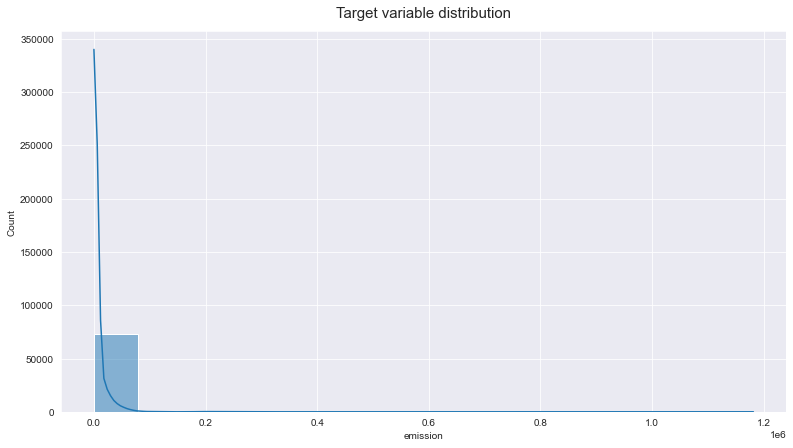

None

17.038027449698163

In [17]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

The target variable is skewed to the right with a a degree of ~17.

Some of the techniques used to handle skewness include:
- Log transform
- Box-cox transform
- Square root transform
- *etc*

<a name="Outliers"></a>
## 4. Outliers


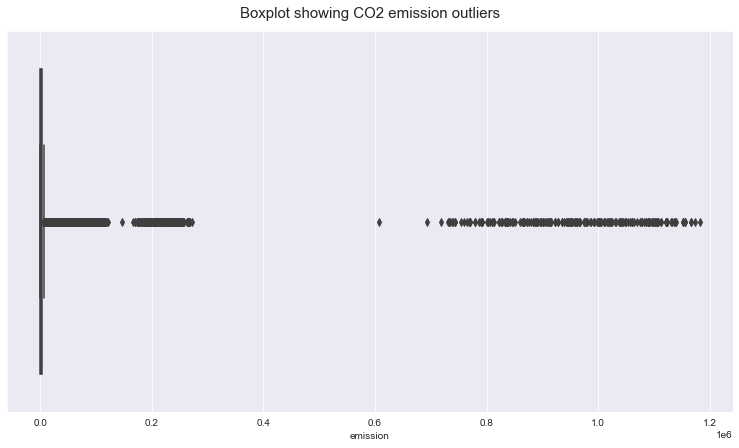

In [18]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

Outliers are those data points which differ significantly from other observations present in given dataset.

Suggestions on how to handle outliers:
 - Transforming the outliers by scaling - log transformation, box-cox transformation ...
 - Dropping outliers
 - Imputation by replacing outliers with mean, median ...
 

<a name="Geo"></a>
## 5. Geo Visualisation - EDA

In [19]:
# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas df
geo_df.head()

latitude  longitude set_type                    geometry
0 -23.73000   28.77000    train  POINT (28.77000 -23.73000)
1 -23.73000   28.77000    train  POINT (28.77000 -23.73000)
2 -23.73000   28.87000    train  POINT (28.87000 -23.73000)
3 -23.73000   28.87000    train  POINT (28.87000 -23.73000)
4 -23.73000   28.97000    train  POINT (28.97000 -23.73000)

In [21]:
# # Create a canvas to plot your map on
# all_data_map = folium.Map(prefer_canvas=True)

# # Create a geometry list from the GeoDataFrame
# geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# # Iterate through list and add a marker for each volcano, color-coded by its type.
# i = 0
# for coordinates in geo_df_list:
#     # assign a color marker for the type set
#     if geo_df.set_type[i] == "train":
#         type_color = "green"
#     elif geo_df.set_type[i] == "test":
#         type_color = "orange"

#     # Place the markers 
#     all_data_map.add_child(
#         folium.CircleMarker(
#             location=coordinates,
#             radius = 1,
#             weight = 4,
#             zoom =10,
#             popup= 
#             "Set: " + str(geo_df.set_type[i]) + "<br>"
#             "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
#             color =  type_color),
#         )
#     i = i + 1
# all_data_map.fit_bounds(all_data_map.get_bounds())
# all_data_map

<a name="Missing"></a>
## 6. Missing values and duplicates

In [22]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(True, True)

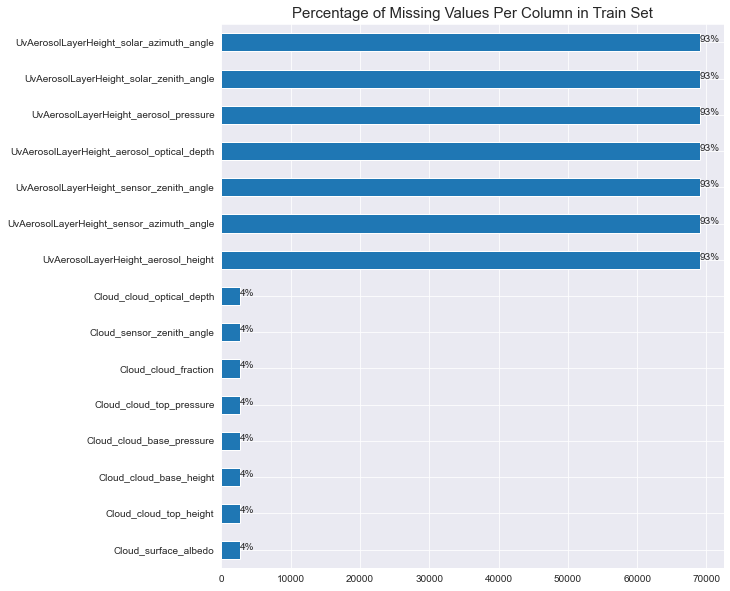

In [23]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

Suggestions on how to handle missing values:
 - Fill in missing values with mode, mean, median..
 - Drop Missing datapoints with missing values
 - Fill in with a large number e.g -999999

In [24]:
train.shape

(74005, 76)

In [25]:
test.isna().sum().sort_values(ascending = False)[:8]

UvAerosolLayerHeight_aerosol_height           26255
UvAerosolLayerHeight_aerosol_pressure         26255
UvAerosolLayerHeight_aerosol_optical_depth    26255
UvAerosolLayerHeight_sensor_zenith_angle      26255
UvAerosolLayerHeight_sensor_azimuth_angle     26255
UvAerosolLayerHeight_solar_azimuth_angle      26255
UvAerosolLayerHeight_solar_zenith_angle       26255
Cloud_surface_albedo                           1133
dtype: int64

In [26]:
to_drop = list(train.isna().sum().sort_values(ascending = False)[:7].keys())

In [27]:
train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

In [43]:
train.head(1000)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0     ID_-23.75_28.75_2019_1 -23.75000   28.75000  2019        1   
1     ID_-23.75_28.75_2019_2 -23.75000   28.75000  2019        2   
2     ID_-23.75_28.75_2019_3 -23.75000   28.75000  2019        3   
3     ID_-23.75_28.75_2019_4 -23.75000   28.75000  2019        4   
4     ID_-23.75_28.75_2019_5 -23.75000   28.75000  2019        5   
5     ID_-23.75_28.75_2019_6 -23.75000   28.75000  2019        6   
6     ID_-23.75_28.75_2019_7 -23.75000   28.75000  2019        7   
7     ID_-23.75_28.75_2019_8 -23.75000   28.75000  2019        8   
8     ID_-23.75_28.75_2019_9 -23.75000   28.75000  2019        9   
9    ID_-23.75_28.75_2019_10 -23.75000   28.75000  2019       10   
10   ID_-23.75_28.75_2019_11 -23.75000   28.75000  2019       11   
11   ID_-23.75_28.75_2019_12 -23.75000   28.75000  2019       12   
12   ID_-23.75_28.75_2019_13 -23.75000   28.75000  2019       13   
13   ID_-23.75_28.75_2019_14 -23.75000   28.75000  2019       14   
14   ID_-23.75_28.75_2019_15 -23.75000   28.75000  2019       15   
15   ID_-23.75_28.75_2019_16 -23.75000   28.75000  2019       16   
16   ID_-23.75_28.75_2019_17 -23.75000   28.75000  2019       17   
17   ID_-23.75_28.75_2019_18 -23.75000   28.75000  2019       18   
18   ID_-23.75_28.75_2019_19 -23.75000   28.75000  2019       19   
19   ID_-23.75_28.75_2019_20 -23.75000   28.75000  2019       20   
20   ID_-23.75_28.75_2019_21 -23.75000   28.75000  2019       21   
21   ID_-23.75_28.75_2019_22 -23.75000   28.75000  2019       22   
22   ID_-23.75_28.75_2019_23 -23.75000   28.75000  2019       23   
23   ID_-23.75_28.75_2019_24 -23.75000   28.75000  2019       24   
24   ID_-23.75_28.75_2019_25 -23.75000   28.75000  2019       25   
25   ID_-23.75_28.75_2019_26 -23.75000   28.75000  2019       26   
26   ID_-23.75_28.75_2019_27 -23.75000   28.75000  2019       27   
27   ID_-23.75_28.75_2019_28 -23.75000   28.75000  2019       28   
28   ID_-23.75_28.75_2019_29 -23.75000   28.75000  2019       29   
29   ID_-23.75_28.75_2019_30 -23.75000   28.75000  2019       30   
30   ID_-23.75_28.75_2019_31 -23.75000   28.75000  2019       31   
31   ID_-23.75_28.75_2019_32 -23.75000   28.75000  2019       32   
32   ID_-23.75_28.75_2019_33 -23.75000   28.75000  2019       33   
33   ID_-23.75_28.75_2019_34 -23.75000   28.75000  2019       34   
34   ID_-23.75_28.75_2019_35 -23.75000   28.75000  2019       35   
35   ID_-23.75_28.75_2019_36 -23.75000   28.75000  2019       36   
36   ID_-23.75_28.75_2019_37 -23.75000   28.75000  2019       37   
37   ID_-23.75_28.75_2019_38 -23.75000   28.75000  2019       38   
38   ID_-23.75_28.75_2019_39 -23.75000   28.75000  2019       39   
39   ID_-23.75_28.75_2019_40 -23.75000   28.75000  2019       40   
40   ID_-23.75_28.75_2019_41 -23.75000   28.75000  2019       41   
41   ID_-23.75_28.75_2019_42 -23.75000   28.75000  2019       42   
42   ID_-23.75_28.75_2019_43 -23.75000   28.75000  2019       43   
43   ID_-23.75_28.75_2019_44 -23.75000   28.75000  2019       44   
44   ID_-23.75_28.75_2019_45 -23.75000   28.75000  2019       45   
45   ID_-23.75_28.75_2019_46 -23.75000   28.75000  2019       46   
46   ID_-23.75_28.75_2019_47 -23.75000   28.75000  2019       47   
47   ID_-23.75_28.75_2019_48 -23.75000   28.75000  2019       48   
48   ID_-23.75_28.75_2019_49 -23.75000   28.75000  2019       49   
49   ID_-23.75_28.75_2019_50 -23.75000   28.75000  2019       50   
50   ID_-23.75_28.75_2019_51 -23.75000   28.75000  2019       51   
51   ID_-23.75_28.75_2019_52 -23.75000   28.75000  2019       52   
52    ID_-23.75_28.75_2020_1 -23.75000   28.75000  2020        1   
53    ID_-23.75_28.75_2020_2 -23.75000   28.75000  2020        2   
54    ID_-23.75_28.75_2020_3 -23.75000   28.75000  2020        3   
55    ID_-23.75_28.75_2020_4 -23.75000   28.75000  2020        4   
56    ID_-23.75_28.75_2020_5 -23.75000   28.75000  2020        5   
57    ID_-23.75_28.75_2020_6 -23.75000   28.75000  2020        6

In [44]:
test.isna().sum()

ID_LAT_LON_YEAR_WEEK                                           0
latitude                                                       0
longitude                                                      0
year                                                           0
week_no                                                        0
SulphurDioxide_SO2_column_number_density                     917
SulphurDioxide_SO2_column_number_density_amf                 917
SulphurDioxide_SO2_slant_column_number_density               917
SulphurDioxide_cloud_fraction                                917
SulphurDioxide_sensor_azimuth_angle                          917
SulphurDioxide_sensor_zenith_angle                           917
SulphurDioxide_solar_azimuth_angle                           917
SulphurDioxide_solar_zenith_angle                            917
SulphurDioxide_SO2_column_number_density_15km                917
CarbonMonoxide_CO_column_number_density                      102
CarbonMonoxide_H2O_column

In [28]:
train = train.ffill()
test = test.ffill()

In [29]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

<a name="Dates"></a>
## 7. Date features EDA

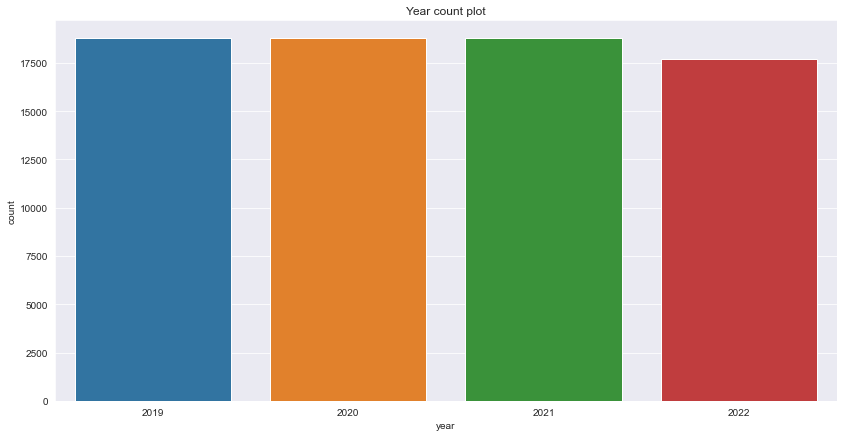

In [30]:
# Year countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'year', data = train)
plt.title('Year count plot')
plt.show()

- The number of observations of CO2 emissions are relatively the same across the years
- Year 2022 has fewer number of observations

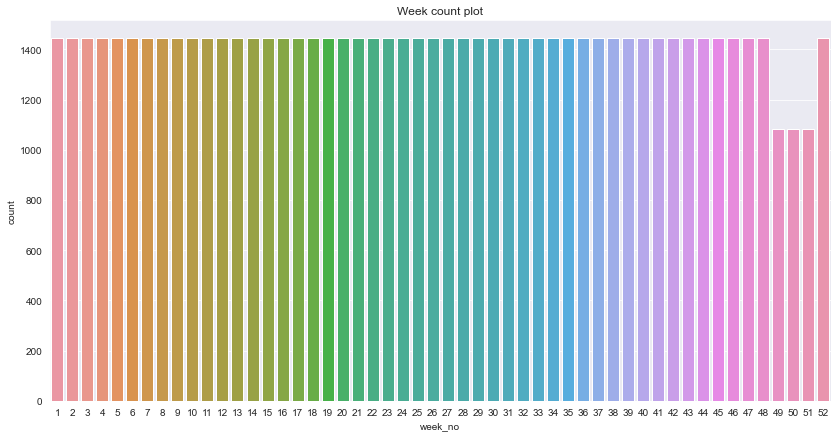

In [31]:
# Week countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'week_no', data = train)
plt.title('Week count plot')
plt.show()

- The number of observations of CO2 emissions are relatively the same across the weeks
- Weeks 49, 50 and 51  have fewer number of observations when compared to the other weeks

In [32]:
train.drop_duplicates(subset = ['year', 'week_no']).groupby(['year'])[['week_no']].count()

week_no
year         
2019       52
2020       52
2021       52
2022       49

- The year 2022 has only 49 weeks available in the data

<a name="Correlations"></a>
## 8. Correlations - EDA

In [33]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

emission                                                 1.00000
NitrogenDioxide_NO2_column_number_density                0.28740
NitrogenDioxide_tropospheric_NO2_column_number_density   0.28320
NitrogenDioxide_NO2_slant_column_number_density          0.24304
SulphurDioxide_SO2_column_number_density_15km            0.07248
SulphurDioxide_SO2_slant_column_number_density           0.06623
Cloud_surface_albedo                                     0.06066
SulphurDioxide_SO2_column_number_density                 0.05970
longitude                                                0.05394
UvAerosolIndex_sensor_altitude                           0.04465
latitude                                                 0.04372
NitrogenDioxide_sensor_altitude                          0.04198
CarbonMonoxide_sensor_altitude                           0.03773
SulphurDioxide_SO2_column_number_density_amf             0.02910
CarbonMonoxide_H2O_column_number_density                 0.02497
SulphurDioxide_cloud_frac

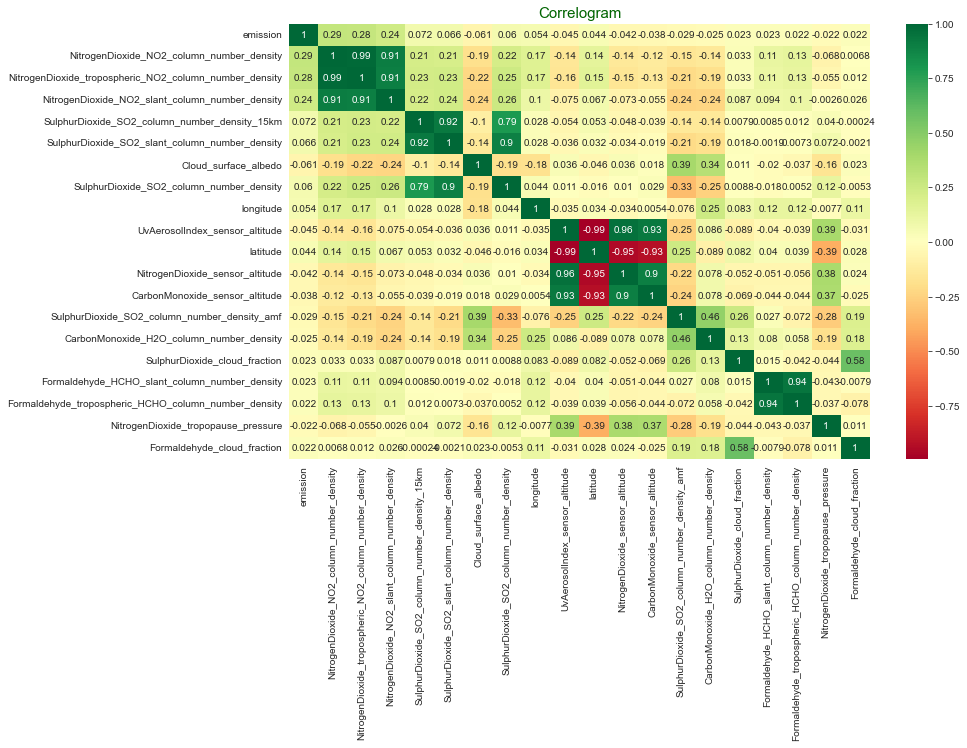

In [34]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

<a name="Timeseries"></a>
## 9. Timeseries visualization - EDA

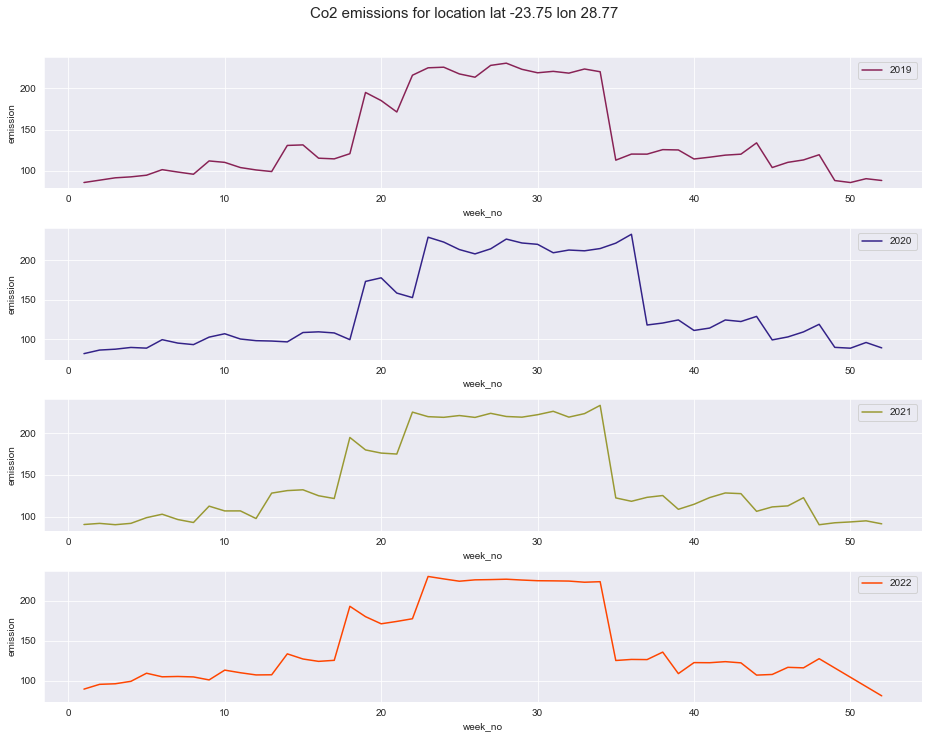

In [40]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -23.73) & (train.longitude == 28.77)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -23.75 lon 28.77', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['#882255','#332288', '#999933' , 'orangered']):
  df = sample_loc[sample_loc.year == year]
  sns.lineplot(df.week_no, df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

<a name="Engineering"></a>
## 10. Feature engineering









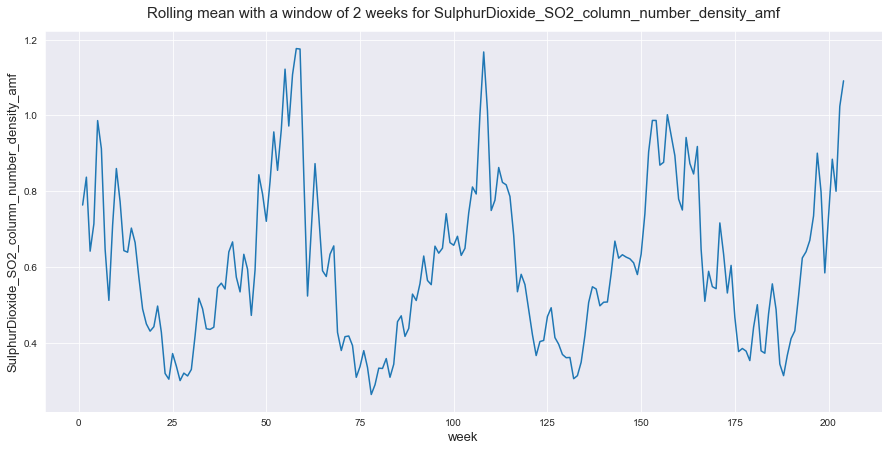

In [41]:
# Examples of feature engineering - Aggregations, cumulative differences, moving averages ...
# Lets explore the rolling mean
# First we create a unique location from lat lon
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-23.73_28.77']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize = (15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

 - There is a cyclic pattern from the above graph, which clearly shows that there is a pattern - This will be helpful to our model
 - With more research and domain knowledge generate useful features that can improve your model performance

 Other examples of feature engineering:
  - Creating cluster regions
  - Interactions between different pollutatnts - ratios, additions,subtractions...
  - Time series features

In [60]:
# train_roll_mean.head()

SulphurDioxide_SO2_column_number_density_roll_mean  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   SulphurDioxide_SO2_column_number_density_amf_roll_mean  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   SulphurDioxide_SO2_slant_column_number_density_roll_mean  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   SulphurDioxide_cloud_fraction_roll_mean  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   SulphurDioxide_sensor_azimuth_angle_roll_mean  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   SulphurDioxide_sensor_zenith_angle_roll_mean  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   SulphurDioxide_solar_azimuth_angle_roll_mean  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   SulphurDioxide_solar_zenith_angle_roll_mean  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   SulphurDioxide_SO2_column_number_density_15km_roll_mean  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   CarbonMonoxide_CO_column_number_density_roll_mean  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   CarbonMonoxide_H2O_column_number_density_roll_mean  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

   CarbonMonoxide_cloud_height_roll_mean  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   CarbonMonoxide_sensor_altitude_roll_mean  \
0                                       NaN 

In [42]:
# Generate the above feature - rolling mean for all locations for both the train and test

# Feature engineering train
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 4).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]

# Feature engineering test
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]
test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 4).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns =  [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

SulphurDioxide_SO2_column_number_density_roll_mean  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                            0.00020    
4                                            0.00023    

   SulphurDioxide_SO2_column_number_density_amf_roll_mean  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                            0.50629        
4                                            0.58844        

   SulphurDioxide_SO2_slant_column_number_density_roll_mean  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                            0.00008          
4                                            0.00010          

   SulphurDioxide_cloud_fraction_roll_mean  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                  0.10875   
4                                  0.12046   

   SulphurDioxide_sensor_azimuth_angle_roll_mean  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                      -25.95042   
4                                       -4.69126   

   SulphurDioxide_sensor_zenith_angle_roll_mean  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                      51.52064   
4                                      47.15771   

   SulphurDioxide_solar_azimuth_angle_roll_mean  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                     -87.60384   
4                                     -82.93177   

   SulphurDioxide_solar_zenith_angle_roll_mean  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                     24.51253   
4                                     22.46038   

   SulphurDioxide_SO2_column_number_density_15km_roll_mean  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                            0.00003         
4                                            0.00004         

   CarbonMonoxide_CO_column_number_density_roll_mean  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                            0.02459   
4                                            0.02400   

   CarbonMonoxide_H2O_column_number_density_roll_mean  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                         2228.21884    
4                                         2141.16190    

   CarbonMonoxide_cloud_height_roll_mean  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                              810.32533   
4                              720.14134   

   CarbonMonoxide_sensor_altitude_roll_mean  \
0                                       NaN 

In [43]:
# Merge engineered features with train and test set

#Train
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)

# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)

# Preview engineered test set
test_eng.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-23.53_27.47_2019_1 -23.53000   27.47000  2019        1   
1  ID_-23.53_27.47_2019_2 -23.53000   27.47000  2019        2   
2  ID_-23.53_27.47_2019_3 -23.53000   27.47000  2019        3   
3  ID_-23.53_27.47_2019_4 -23.53000   27.47000  2019        4   
4  ID_-23.53_27.47_2019_5 -23.53000   27.47000  2019        5   

   SulphurDioxide_SO2_column_number_density  \
0                                   0.00008   
1                                   0.00018   
2                                   0.00006   
3                                   0.00048   
4                                   0.00019   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                       0.45447   
1                                       0.42317   
2                                       0.71309   
3                                       0.43445   
4                                       0.78304   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                         0.00003   
1                                         0.00006   
2                                         0.00004   
3                                         0.00017   
4                                         0.00014   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                        0.11429                            -80.28631   
1                        0.07510                            -17.76569   
2                        0.11421                             16.72565   
3                        0.13139                            -22.47534   
4                        0.16114                              4.75036   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                            55.54896                           -94.96439   
1                            56.32125                           -89.76383   
2                            33.66298                           -86.37657   
3                            60.54937                           -79.31057   
4                            38.09723                           -76.27611   

   SulphurDioxide_solar_zenith_angle  \
0                           30.22988   
1                           23.31351   
2                           20.60369   
3                           23.90303   
4                           22.02129   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                        0.00002   
1                                        0.00002   
2                                        0.00002   
3                                        0.00007   
4                                        0.00006   

   CarbonMonoxide_CO_column_number_density  \
0                                  0.02594   
1                                  0.02504   
2                                  0.02502   
3                                  0.02236   
4                                  0.02358   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                2343.10925                   1303.42130   
1                                2187.90980                    347.59164   
2                                2313.46731                   1310.41037   
3                                2068.38900                    279.87800   
4                                1994.88150                    942.68533   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    836310.92669                            -80.52554   
1                    836017.16010                            -56.48058   
2                    835944.80127                              2.65210   
3                    836558.88281                            -92.57146   
4                    835760.43695                              2.70936   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_an

<a name="Modelling"></a>
## 11.  Modelling

In [44]:
# Selecting the independent variables and the target variable

X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train_eng.emission

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Instantiating the model
# clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
# clf.fit(X_train, y_train)

# Making predictions
# y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
# print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 23432.342352754695

In [46]:
 opt_params = {
          'iterations':10000,
          'verbose':5000,
          'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : int(6.599144674342465),
          # 'use_best_model' : True, 
          'loss_function' : 'RMSE',
          #'model_size_reg' : 0.4833187897595954
         }

In [47]:
# Instantiating the model
clf = CatBoostRegressor(random_state = SEED, **opt_params)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') # 23432.342352754695

0:	learn: 48487.7323520	total: 247ms	remaining: 41m 13s
5000:	learn: 449.8166923	total: 6m 38s	remaining: 6m 38s
9999:	learn: 203.4725008	total: 13m 26s	remaining: 0us
RMSE Score: 5099.975461616187


## CV

In [95]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np


opt_params = {
          'iterations':5000,
          'verbose':1000,
          'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : 8, #int(6.599144674342465),
          # 'use_best_model' : True, 
          'loss_function' : 'RMSE',
          'model_size_reg' : 0.4833187897595954
         }
    
# Instantiating the model
clf = CatBoostRegressor(random_state = SEED, **opt_params)
# clf.fit(X_train, y_train)

# X is your input data, y is your target variable
kf = KFold(n_splits=5)
rmse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Predict on the test data and calculate RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
# Calculate the average RMSE across all folds
mean_rmse = np.mean(rmse_scores)


KeyError: "None of [Int64Index([14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809,\n            14810,\n            ...\n            73995, 73996, 73997, 73998, 73999, 74000, 74001, 74002, 74003,\n            74004],\n           dtype='int64', length=59204)] are in the [columns]"

In [97]:
n_splits = 5
folds = KFold(n_splits= n_splits, random_state= SEED, shuffle = True)

In [84]:
X.head()

latitude  longitude  year  week_no  \
0 -23.75000   28.75000  2019        1   
1 -23.75000   28.75000  2019        2   
2 -23.75000   28.75000  2019        3   
3 -23.75000   28.75000  2019        4   
4 -23.75000   28.75000  2019        5   

   SulphurDioxide_SO2_column_number_density  \
0                                   0.00017   
1                                  -0.00016   
2                                  -0.00007   
3                                   0.00015   
4                                   0.00002   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                       0.71317   
1                                       0.81291   
2                                       0.86031   
3                                       0.42228   
4                                       1.00458   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                         0.00010   
1                                        -0.00014   
2                                        -0.00006   
3                                         0.00009   
4                                         0.00003   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                        0.22393                             24.93944   
1                        0.08028                             16.62416   
2                        0.16105                            -13.23724   
3                        0.04650                            -13.53465   
4                        0.21425                            -13.47572   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                            56.89620                           -89.54503   
1                            31.13726                           -88.95653   
2                            44.44106                           -86.53589   
3                            61.25250                           -80.95763   
4                            30.80077                           -75.27775   

   SulphurDioxide_solar_zenith_angle  \
0                           17.99157   
1                           20.22361   
2                           23.73720   
3                           22.60133   
4                           20.76787   

   SulphurDioxide_SO2_column_number_density_15km  \
0                                        0.00003   
1                                       -0.00007   
2                                       -0.00003   
3                                        0.00003   
4                                        0.00001   

   CarbonMonoxide_CO_column_number_density  \
0                                  0.02341   
1                                  0.02419   
2                                  0.02370   
3                                  0.02236   
4                                  0.02304   

   CarbonMonoxide_H2O_column_number_density  CarbonMonoxide_cloud_height  \
0                                2829.88111                   2583.71728   
1                                2136.61493                   1864.31924   
2                                1907.51550                   1904.70191   
3                                2122.06795                   1696.20634   
4                                1750.01113                   1175.44583   

   CarbonMonoxide_sensor_altitude  CarbonMonoxide_sensor_azimuth_angle  \
0                    835381.85189                             24.22746   
1                    836015.10938                            -14.29023   
2                    835929.14650                              3.86252   
3                    835722.44792                             15.10151   
4                    835931.96250                            -28.06828   

   CarbonMonoxide_sensor_zenith_angle  CarbonMonoxide_solar_azimuth_angle  \
0                            56.93740                           -89.60650   
1                            27.51455                     

In [86]:
test = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)

In [98]:
train_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))
rmse_score = []

target = y
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y)):
    print(50*'-')
    print(f'Fold {fold_+1} / {n_splits}' )
    print(100*'-')
    X_trn, X_val, X_test = X.iloc[trn_idx], X.iloc[val_idx], test
    y_trn, y_val = np.log(y.iloc[trn_idx]), np.log(y.iloc[val_idx])

    clf = CatBoostRegressor(random_state = SEED, **opt_params)#n_estimators = 5000, learning_rate = 0.02, depth = 8, verbose = 0,
#                             random_state = 42,
#                             use_best_model = True,  task_type='GPU', loss_function='RMSE',)
    
    clf.fit(X_trn,y_trn,eval_set=[(X_val, y_val)], early_stopping_rounds = 200, verbose = 1000)

    predTrain = np.exp(clf.predict(X_val))
    train_preds[val_idx] = predTrain
    
    error = rmse(target.iloc[val_idx], predTrain, squared = False)
    rmse_score.append(error)
    print(f"RMSE : {error}")

    predTest = np.exp(clf.predict(X_test))
    predTest[predTest < 0] = 0
    test_preds += predTest
    print(100*'-')

print(f"Overall RMSE : {np.mean(rmse_score)}")

--------------------------------------------------
Fold 1 / 5
----------------------------------------------------------------------------------------------------
0:	learn: 2.4392618	test: 2.4196656	best: 2.4196656 (0)	total: 77.6ms	remaining: 6m 27s
1000:	learn: 0.1639122	test: 0.2107027	best: 0.2107027 (1000)	total: 1m 9s	remaining: 4m 36s
2000:	learn: 0.0916597	test: 0.1674326	best: 0.1674326 (2000)	total: 2m 20s	remaining: 3m 30s
3000:	learn: 0.0623698	test: 0.1558952	best: 0.1558929 (2992)	total: 3m 33s	remaining: 2m 22s
4000:	learn: 0.0455363	test: 0.1519934	best: 0.1519907 (3999)	total: 4m 50s	remaining: 1m 12s
4999:	learn: 0.0342698	test: 0.1503261	best: 0.1503214 (4995)	total: 6m 4s	remaining: 0us

bestTest = 0.1503213703
bestIteration = 4995

Shrink model to first 4996 iterations.
RMSE : 13125.712780199578
----------------------------------------------------------------------------------------------------
--------------------------------------------------
Fold 2 / 5
---------

In [ ]:
X_test.head()

latitude  longitude  year  week_no  \
36836 -28.15000   21.15000  2021       38   
54382 -29.65000   30.55000  2020        6   
59155 -29.85000   30.85000  2021       12   
49683 -29.45000   30.25000  2020       22   
37156 -28.15000   21.35000  2019       52   

       SulphurDioxide_SO2_column_number_density  \
36836                                   0.00036   
54382                                   0.00026   
59155                                   0.00000   
49683                                  -0.00037   
37156                                  -0.00005   

       SulphurDioxide_SO2_column_number_density_amf  \
36836                                       0.40022   
54382                                       0.70984   
59155                                       0.00000   
49683                                       0.20361   
37156                                       1.06684   

       SulphurDioxide_SO2_slant_column_number_density  \
36836                                         0.00011   
54382                                         0.00018   
59155                                         0.00000   
49683                                        -0.00006   
37156                                        -0.00004   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
36836                        0.12798                            -11.32570   
54382                        0.05779                             -9.54098   
59155                        0.00000                              0.00000   
49683                        0.19163                             72.09401   
37156                        0.12360                            -73.17503   

       SulphurDioxide_sensor_zenith_angle  ...  \
36836                            59.82414  ...   
54382                            60.64862  ...   
59155                             0.00000  ...   
49683                            61.25743  ...   
37156                            31.04180  ...   

       Cloud_cloud_top_pressure_roll_mean  Cloud_cloud_top_height_roll_mean  \
36836                             0.00000                           0.00000   
54382                         87604.50758                        1260.67845   
59155                         75632.71146                        2682.52049   
49683                         73195.13123                        3085.13255   
37156                         58558.74166                        5226.07161   

       Cloud_cloud_base_pressure_roll_mean  Cloud_cloud_base_height_roll_mean  \
36836                              0.00000                            0.00000   
54382                          89884.26150                         1032.61928   
59155                          84885.51320                         1709.99876   
49683                          76128.15890                         2684.23167   
37156                          62264.91861                         4586.63521   

       Cloud_cloud_optical_depth_roll_mean  Cloud_surface_albedo_roll_mean  \
36836                              0.00000                         0.00000   
54382                             11.00769                         0.30485   
59155                             24.75862                         0.25198   
49683                              4.48731                         0.22666   
37156                             17.03806                         0.37194   

       Cloud_sensor_azimuth_angle_roll_mean  \
36836                               0.00000   
54382                             -83.24249   
59155                             -24.29842   
49683                             -12.33305   
37156                             -41.16584   

       Cloud_sensor_zenith_angle_roll_mean  \
36836                              0.00000   
54382                             46.66755   
59155                             53.13835   
49683                             45.51857   
37156                             42.03886   



In [ ]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

latitude  longitude  year  week_no     emission   prediction  \
20432 -25.95000   29.35000  2021       34 992748.75000  36301.78777   
20344 -25.95000   29.35000  2019       50 979504.20000 103261.03637   
20362 -25.95000   29.35000  2020       16 867647.70000  12916.31619   
20397 -25.95000   29.35000  2020       51 934806.80000  94880.18263   
20458 -25.95000   29.35000  2022        8 835917.30000  11699.94290   

             error  
20432 956446.96223  
20344 876243.16363  
20362 854731.38381  
20397 839926.61737  
20458 824217.35710

In [48]:
# Analyse predictions
pred_errors = X_test.copy()
pred_errors['emission'] = y_test
pred_errors['prediction'] = y_pred
pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
pred_errors.head()

latitude  longitude  year  week_no     emission    prediction  \
20297 -25.93000   29.37000  2019        3 833601.25000  487245.29577   
20296 -25.93000   29.37000  2019        2 792294.30000  489154.56918   
20428 -25.93000   29.37000  2021       30 945487.30000 1083374.01104   
20499 -25.93000   29.37000  2022       52 607522.00000  739978.85922   
20343 -25.93000   29.37000  2019       49 998633.94000  888884.95228   

             error  
20297 346355.95423  
20296 303139.73082  
20428 137886.71104  
20499 132456.85922  
20343 109748.98772

In [49]:
pred_errors.tail()

latitude  longitude  year  week_no   emission  prediction   error
1795  -23.73000   29.57000  2021       52   22.78606    22.89712 0.11106
66005 -31.63000   29.07000  2022       45  711.96375   711.85654 0.10721
64122 -31.53000   28.87000  2022        7 3764.70530  3764.79289 0.08759
34860 -28.03000   21.17000  2019       11   60.66017    60.67609 0.01592
41278 -28.43000   21.07000  2020       22    1.98929     1.97430 0.01498

In [ ]:
pred_errors.tail()

latitude  longitude  year  week_no  emission  prediction   error
35350 -28.05000   21.35000  2020       39   2.66638     2.66618 0.00019
43703 -28.65000   21.25000  2019       39   1.04626     1.04645 0.00019
30632 -27.05000   24.65000  2020       36   2.13081     2.13094 0.00013
35311 -28.05000   21.35000  2019       52   0.94331     0.94340 0.00009
39257 -28.25000   21.45000  2020       51   1.02328     1.02323 0.00005

In [81]:
train.emission.describe()

count     74005.00000
mean       7891.06097
std       52571.60466
min           0.04806
25%         154.54720
50%         723.13586
75%        2773.02930
max     1181701.20000
Name: emission, dtype: float64

In [80]:
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
feat_reduce = list(impo_df.reset_index().feature[:55])

In [82]:
# Instantiating the model
clf2 = CatBoostRegressor(random_state = SEED, **opt_params)
clf2.fit(X_train[feat_reduce], y_train)

# Making predictions
y_pred1 = clf2.predict(X_test[feat_reduce])

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred1, squared=False)}') # 23432.342352754695

RMSE Score: 4165.708113415844


In [93]:
import lightgbm as lgb

# set up parameters for LightGBM
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 4,
          'num_leaves': 55,
          'learning_rate': 0.09,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'early_stopping_round': 1000,
          'n_estimators': 25000}

reg_lgb = lgb.LGBMRegressor(n_estimators=1000)

reg_lgb.fit(X_train[feat_reduce], y_train, eval_set=(X_test[feat_reduce], y_test),verbose=500)
# reg_lgb.fit(X_train[feat_reduce], y_train, )

# Making predictions
y_pred2 = reg_lgb.predict(X_test[feat_reduce])

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred2, squared=False)}') # 23432.342352754695

[500]	valid_0's l2: 5.05759e+07
[1000]	valid_0's l2: 5.02882e+07
RMSE Score: 7091.417351586121


In [94]:
import xgboost as xgb
reg_xgb = xgb.XGBRegressor(base_score=0.5, 
                           n_estimators=20000,
                           objective='reg:linear',
                           max_depth=5,
                           early_stopping_rounds=100,
                           learning_rate=0.01)

reg_xgb.fit(X_train[feat_reduce], y_train, eval_set=((X_test[feat_reduce], y_test),), verbose=5000)

[00:05:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:48720.77758
[1617]	validation_0-rmse:16128.24463


XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

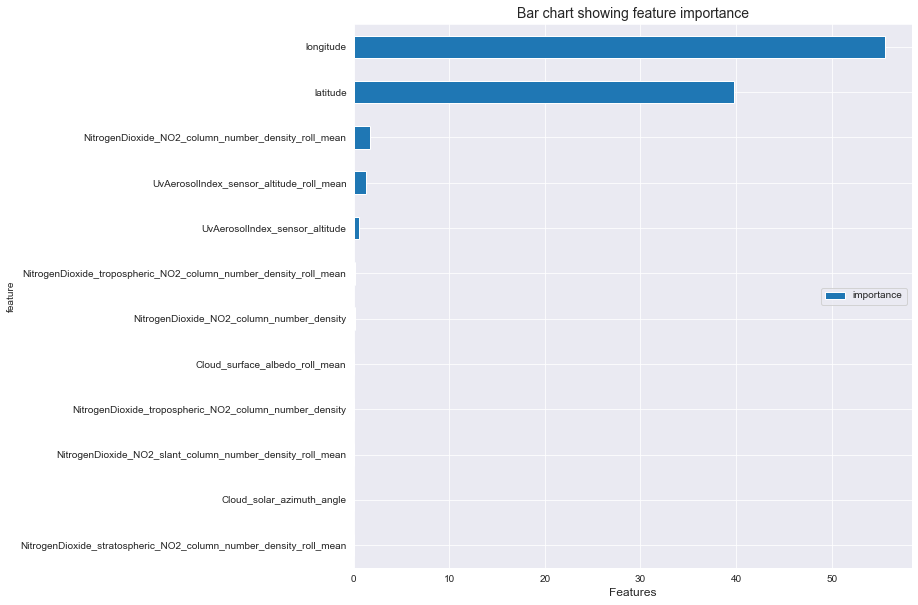

In [66]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

<a name="Predictions"></a>
## 12. Making predictions of the test set and creating a submission file

In [50]:
# Make prediction on the test set
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

ID_LAT_LON_YEAR_WEEK   emission
0  ID_-23.53_27.47_2019_1 1626.73049
1  ID_-23.53_27.47_2019_2 1058.84432
2  ID_-23.53_27.47_2019_3 2492.46158
3  ID_-23.53_27.47_2019_4 3650.06505
4  ID_-23.53_27.47_2019_5 6377.53725

In [51]:
# Create file
sub_file.to_csv('quicktest_l.csv', index = False) # Download subfile and submit to zindi for scoring

In [ ]:
"C:\Users\TiOluwani\Desktop\Tech\competitions\UmojaHack\2ndpred.csv"

In [55]:
previous = pd.read_csv("C:/Users/TiOluwani/Desktop/Tech/competitions/UmojaHack/2ndpred.csv")

In [56]:
previous['ID_LAT_LON_YEAR_WEEK'] = sub_file['ID_LAT_LON_YEAR_WEEK']

In [58]:
previous.to_csv('ealier_train.csv', index=False)